## Gradient Descent (Logistic Regression)

In [15]:
from sklearn.datasets import make_classification
import numpy as np

In [3]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant= 0, n_classes = 2, 
                         n_clusters_per_class=1, random_state=41, hypercube=False,class_sep=20 )

In [4]:
import matplotlib.pyplot as plt

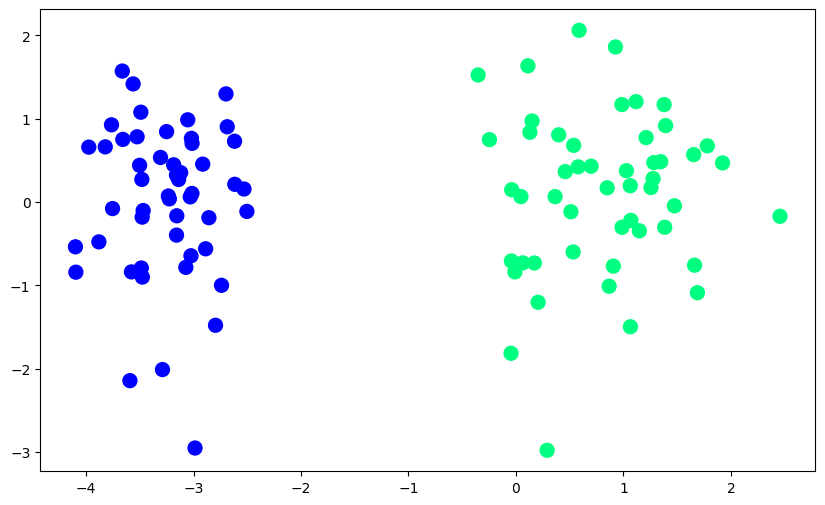

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)

## using sklearn


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lgr = LogisticRegression(penalty=None, solver='sag')   #penalty - regression , solver - methods


In [9]:
lgr.fit(X,y)

D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [10]:
print(lgr.coef_)
print(lgr.intercept_)

[[4.82378526 0.22010935]]
[5.79176265]


In [12]:
#converting Ax+By+C = 0 in terms of y=mx+b
# we get m = -(A/B) and b = -(C/B)

m = -(lgr.coef_[0][0]/lgr.coef_[0][1])
b = -(lgr.intercept_/lgr.coef_[0][1])

In [13]:
print(m,b)

-21.915403823825717 [-26.31311524]


In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [29]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)  # add 1 in first value in all column
    W = np.ones(X.shape[1])
    lr = 0.5   #learning rate
    for i in range(4000):   # in epochs
        Y_hat = sigmoid(np.dot(X,W))
        W = W + lr*(np.dot((y-Y_hat),X)/ X.shape[0])

    return W[1:],W[0]
        

In [30]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [31]:
coef_, intercept_ = gd(X,y)

In [32]:
print(coef_)
print(intercept_)

[4.68436433 0.19840936]
5.611093076370917


In [33]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [34]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

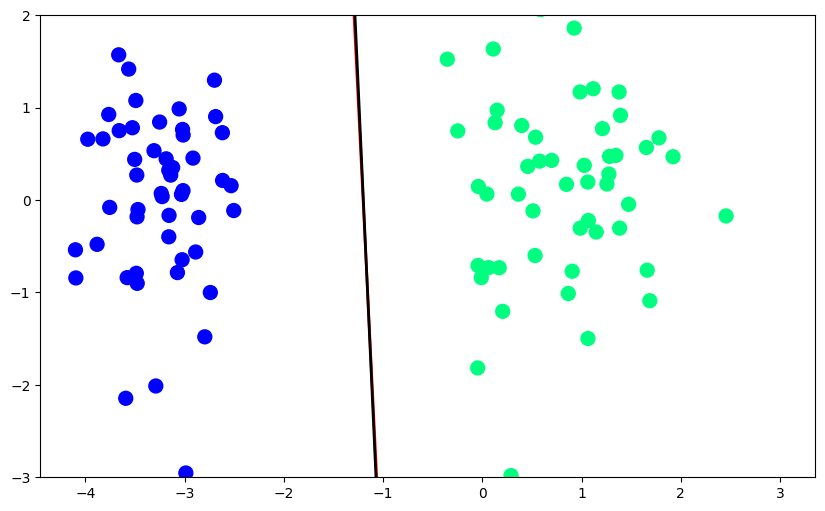

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red',linewidth=2)
plt.plot(x_input1,y_input1, color='black',linewidth=2)

plt.scatter(X[:,0],X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2) #limit of y